## ML Modelling

### Setup

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [31]:
df = pd.read_csv('../final_training.csv')

In [32]:
# set X & y
X = df.drop(columns=['arr_delay'])
y = df['arr_delay']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [34]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['mkt_unique_carrier', 'tail_num', 'branded_code_share'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109718 entries, 95770 to 136767
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   mkt_carrier_fl_num       109718 non-null  int64  
 1   origin_airport_id        109718 non-null  int64  
 2   dest_airport_id          109718 non-null  int64  
 3   crs_dep_time             109718 non-null  int64  
 4   crs_arr_time             109718 non-null  int64  
 5   crs_elapsed_time         109718 non-null  float64
 6   distance                 109718 non-null  float64
 7   mkt_unique_carrier       109718 non-null  int64  
 8   tail_num                 109718 non-null  int64  
 9   branded_code_share       109718 non-null  int64  
 10  year                     109718 non-null  int64  
 11  month                    109718 non-null  int64  
 12  week                     109718 non-null  int64  
 13  day                      109718 non-null  int64  
 14  

### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

                              PC0       PC1       PC2       PC3       PC4  \
mkt_carrier_fl_num       0.369200 -0.142755 -0.029148 -0.045325 -0.032557   
origin_airport_id       -0.060014  0.026604 -0.022833  0.145050  0.018461   
dest_airport_id         -0.092879  0.037042  0.018536 -0.029231  0.057927   
crs_dep_time             0.010334  0.008435  0.008475 -0.484692  0.493572   
crs_arr_time             0.000849  0.014435  0.011341 -0.497413  0.467652   
crs_elapsed_time        -0.549281  0.222595  0.077663 -0.121026 -0.159545   
distance                -0.555784  0.224422  0.084193 -0.116740 -0.155497   
mkt_unique_carrier      -0.262676  0.068252 -0.055209  0.408011  0.459634   
tail_num                -0.103169  0.041364  0.022030 -0.034823 -0.032214   
branded_code_share      -0.123152  0.001671 -0.069012  0.420953  0.486471   
year                    -0.015714  0.000436  0.011995  0.007767  0.005998   
month                    0.057115 -0.045769  0.692357  0.081371  0.054380   

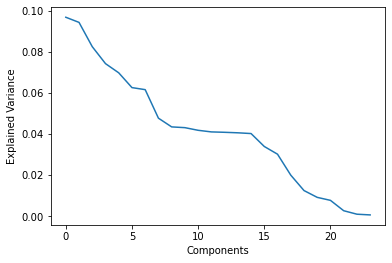

In [11]:
from sklearn.decomposition import PCA

# You must normalize the data before applying the fit method
df_normalized=(X_train - X_train.mean()) / X_train.std()
pca = PCA(n_components=X_train.shape[1])
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=X_train.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

In [13]:
pca

PCA(n_components=24)

### Modeling

I will be using the following models.

- Linear regression
- Polynomial Regression
- Random Forest

#### Linear Regression Models Without Scaling

##### Default Linear Regression

In [8]:
from sklearn.model_selection import cross_val_score

# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [10]:
from sklearn.linear_model import LinearRegression

# Train model
lr = LinearRegression().fit(X_train, y_train)

# predict on test
y_pred = lr.predict(X_test)

# get cross val scores
get_cv_scores(lr)

# other metric scores:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))

CV Mean:  0.00989977201895933
STD:  0.0007983099573922842


Mean Absolute Error (MAE): 24.197861503360745
Mean Squared Error (MSE): 2472.6383279632582
Root Mean Squared Error (RMSE): 49.7256304933709
Mean Absolute Percentage Error (MAPE): 516061693570598.56
Explained Variance Score: 0.00981433120962294
Max Error: 1595.7072694316316
Median Absolute Error: 16.196187224145092
R^2: 0.009811203780386912


***

##### Ridge Regression

In [11]:
from sklearn.linear_model import Ridge

# Train model with default alpha = 1
ridge = Ridge(alpha=1).fit(X_train, y_train)

# predict on test
y_pred = ridge.predict(X_test)

# get cross val scores
get_cv_scores(ridge)

# other metric scores:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))

CV Mean:  0.009899774529834282
STD:  0.0007983093310328803


Mean Absolute Error (MAE): 24.197861437150014
Mean Squared Error (MSE): 2472.638320507312
Root Mean Squared Error (RMSE): 49.725630418400044
Mean Absolute Percentage Error (MAPE): 516061600552009.7
Explained Variance Score: 0.00981433419216804
Max Error: 1595.7072782735654
Median Absolute Error: 16.196176186682806
R^2: 0.0098112067661833


In [28]:
from sklearn.model_selection import GridSearchCV

# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.009902146347977325
Best Params:  {'alpha': 1000}


In [12]:
from sklearn.linear_model import Ridge

# Train model with default alpha = 1
ridge = Ridge(alpha=1000).fit(X_train, y_train)

# predict on test
y_pred = ridge.predict(X_test)

# get cross val scores
get_cv_scores(ridge)

# other metric scores:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))

CV Mean:  0.009902146347977325
STD:  0.0007976584126194733


Mean Absolute Error (MAE): 24.19779770259745
Mean Squared Error (MSE): 2472.631042659081
Root Mean Squared Error (RMSE): 49.72555723829629
Mean Absolute Percentage Error (MAPE): 515969773254632.9
Explained Variance Score: 0.009817245535657326
Max Error: 1595.715847250788
Median Absolute Error: 16.19721638745341
R^2: 0.009814121241663809


***

##### Lasso Regression

In [14]:
from sklearn.linear_model import Lasso

# Train model with default alpha=1
lasso = Lasso(alpha=0.1).fit(X_train, y_train)

# predict on test
y_pred = lasso.predict(X_test)

# get cross val scores
get_cv_scores(lasso)

# other metric scores:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))

CV Mean:  0.009941882962259752
STD:  0.000771111608103567


Mean Absolute Error (MAE): 24.196049235705235
Mean Squared Error (MSE): 2472.4509446380503
Root Mean Squared Error (RMSE): 49.723746285231265
Mean Absolute Percentage Error (MAPE): 514468388704360.6
Explained Variance Score: 0.009889289553741132
Max Error: 1596.1178524952336
Median Absolute Error: 16.224097190835728
R^2: 0.009886243007564244


In [30]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.009941882962259752
Best Params:  {'alpha': 0.1}


***

##### Elastic Net

In [37]:
from sklearn.linear_model import ElasticNet

# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=0.1, l1_ratio=1).fit(X_train, y_train)

# predict on train
y_pred_train = elastic_net.predict(X_train)

# predict on test
y_pred_test = elastic_net.predict(X_test)

# other metric scores:
print('Test - Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred_test, squared=False))
print('Test - R^2:', metrics.r2_score(y_test, y_pred_test))
print('Train - Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_train, y_pred_train, squared=False))
print('Train - R^2:', metrics.r2_score(y_train, y_pred_train))

Test - Root Mean Squared Error (RMSE): 49.723746285231265
Test - R^2: 0.009886243007564244
Train - Root Mean Squared Error (RMSE): 47.37090680919174
Train - R^2: 0.010430007765523275


In [33]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best Score:  0.009941882962259752
Best Params:  {'alpha': 0.1, 'l1_ratio': 1}


***

#### Linear Regression Models With Scaling

In [2]:
df = pd.read_csv('../final_training.csv')

In [3]:
# set X & y
X = df.drop(columns=['arr_delay'])
y = df['arr_delay']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [5]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['mkt_unique_carrier', 'tail_num', 'branded_code_share'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

##### Default Linear Regression

In [7]:
from sklearn.model_selection import cross_val_score

# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [8]:
from sklearn.linear_model import LinearRegression

# Train model
lr = LinearRegression().fit(X_train, y_train)

# get cross val scores
get_cv_scores(lr)

CV Mean:  0.00989977201895933
STD:  0.0007983099573922737




***

##### Ridge Regression

In [9]:
from sklearn.linear_model import Ridge

# Train model with default alpha = 1
ridge = Ridge(alpha=1).fit(X_train, y_train)

# get cross val scores
get_cv_scores(ridge)

CV Mean:  0.009899835372126686
STD:  0.000798289985513629




In [10]:
from sklearn.model_selection import GridSearchCV

# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.009939153849484428
Best Params:  {'alpha': 1000}


***

##### Lasso Regression

In [47]:
from sklearn.linear_model import Lasso

# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(X_train, y_train)

# get cross val scores
get_cv_scores(lasso)

CV Mean:  0.008578163906967196
STD:  0.000473566269171454




In [48]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.009959448394709436
Best Params:  {'alpha': 0.01}


In [38]:
from sklearn.linear_model import Lasso

# Train model with default alpha=1
lasso = Lasso(alpha=0.01).fit(X_train, y_train)

# predict on train
y_pred_train = lasso.predict(X_train)

# predict on test
y_pred_test = lasso.predict(X_test)

# other metric scores:
print('Test - Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred_test, squared=False))
print('Test - R^2:', metrics.r2_score(y_test, y_pred_test))
print('Train - Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_train, y_pred_train, squared=False))
print('Train - R^2:', metrics.r2_score(y_train, y_pred_train))

Test - Root Mean Squared Error (RMSE): 49.72535530918459
Test - R^2: 0.009822163261101635
Train - Root Mean Squared Error (RMSE): 47.370118942950334
Train - R^2: 0.010462924268896279


***

##### Elastic Net

In [49]:
from sklearn.linear_model import ElasticNet

# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train, y_train)

# get cross val scores
get_cv_scores(elastic_net)

CV Mean:  0.008409071527911548
STD:  0.00041436269477327834




In [50]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best Score:  0.009959448394709436
Best Params:  {'alpha': 0.01, 'l1_ratio': 1}


/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.877e+07, tolerance: 1.988e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.016e+08, tolerance: 2.032e+04 Linear regression models with null weight for the l1 regularization term are mor

***

#### Polynomial Regression With Scaling

In [11]:
df = pd.read_csv('../final_training.csv')

In [12]:
# set X & y
X = df.drop(columns=['arr_delay'])
y = df['arr_delay']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [14]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['mkt_unique_carrier', 'tail_num', 'branded_code_share'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

def create_polynomial_regression_model(degree):
    
    "Creates a polynomial regression model for the given degree"
  
    poly_features = PolynomialFeatures(degree=degree)
    
    
    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
    
    
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
    
    
    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
    
    
    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)
    
    
    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)
    
    
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
    
    print("\n")
    
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))

In [17]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 47.150909319039535
R2 score of training set is 0.019600083113504585


The model performance for the test set
-------------------------------------------
RMSE of test set is 191880.29149298512
R2 score of test set is -14744095.011314606


In [18]:
create_polynomial_regression_model(3)

The model performance for the training set
-------------------------------------------
RMSE of training set is 46.327855162599576
R2 score of training set is 0.05352857037302883


The model performance for the test set
-------------------------------------------
RMSE of test set is 80005990.53295365
R2 score of test set is -2563317627587.0947


***

#### Random Forest

##### Random Forest Grid Search without Feature Selection

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [18]:
df = pd.read_csv('../final_training.csv')

In [19]:
# set X & y
X = df.drop(columns=['arr_delay'])
y = df['arr_delay']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [21]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['mkt_unique_carrier', 'tail_num', 'branded_code_share'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [25]:
rfc=RandomForestClassifier(random_state=42)

In [26]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [27]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [28]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200}

In [22]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=7, criterion='gini')

In [23]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)

In [24]:
y_pred=rfc1.predict(X_test)

In [26]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,y_pred))

Accuracy for Random Forest on CV data:  0.02987899538523701


In [27]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 22.010569295876486
Mean Squared Error (MSE): 2734.0004465899665
Root Mean Squared Error (RMSE): 52.287670120114996
Mean Absolute Percentage Error (MAPE): 893670929608790.6
Explained Variance Score: -0.00024320443902325906
Max Error: 1605.0
Median Absolute Error: 10.0
R^2: -0.09485345287142621


##### Random Forest With Scaling, No Feature Selection

In [150]:
df = pd.read_csv('../final_training.csv')

In [151]:
# set X & y
X = df.drop(columns=['arr_delay'])
y = df['arr_delay']

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [153]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['mkt_unique_carrier', 'tail_num', 'branded_code_share'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [155]:
rfc1 = RandomForestClassifier(random_state=42, 
                              max_features='auto', 
                              n_estimators= 200, 
                              max_depth=7, 
                              criterion='gini')

In [156]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)

In [141]:
y_pred = rfc1.predict(X_test)

Accuracy for Random Forest on CV data:  0.03070837675180231


In [157]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))

Accuracy Score: 0.03070837675180231
Mean Absolute Error (MAE): 22.0533568679157
Mean Squared Error (MSE): 2739.6970631393147
Root Mean Squared Error (RMSE): 52.34211557760457
Mean Absolute Percentage Error (MAPE): 903631467244554.8
Explained Variance Score: -0.00024635286041063686
Max Error: 1605.0
Median Absolute Error: 10.0
R^2: -0.09713471083775826


***

##### Random Forest with Feature Selection

In [158]:
df = pd.read_csv('../final_training.csv')

In [159]:
# set X & y
X = df.drop(columns=['arr_delay'])
y = df['arr_delay']

In [160]:
X.shape

(156741, 24)

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [136]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['mkt_unique_carrier', 'tail_num', 'branded_code_share'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [138]:
from sklearn.feature_selection import f_regression, SelectKBest
skb = SelectKBest(f_regression, k=12)
X_train_selected = skb.fit_transform(X_train, y_train)

In [139]:
rfc1 = RandomForestClassifier(random_state=42, 
                              max_features='auto', 
                              n_estimators= 200, 
                              max_depth=7, 
                              criterion='gini')

In [140]:
rfc1.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)

In [141]:
X_test_selected = skb.transform(X_test)
y_pred = rfc1.predict(X_test_selected)

print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test, y_pred))

Accuracy for Random Forest on CV data:  0.03070837675180231


In [142]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 22.0533568679157
Mean Squared Error (MSE): 2739.6970631393147
Root Mean Squared Error (RMSE): 52.34211557760457
Mean Absolute Percentage Error (MAPE): 903631467244554.8
Explained Variance Score: -0.00024635286041063686
Max Error: 1605.0
Median Absolute Error: 10.0
R^2: -0.09713471083775826


In [ ]:
# k=10 0.030453182485166833
# k=12 0.03070837675180231
# k=14 0.03070837675180231
# k=16 0.02941113922973863

***

#### AdaBoost Regressor

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score

In [162]:
df = pd.read_csv('../final_training.csv')

In [163]:
# set X & y
X = df.drop(columns=['arr_delay'])
y = df['arr_delay']

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [165]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['mkt_unique_carrier', 'tail_num', 'branded_code_share'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [178]:
ada = AdaBoostRegressor()

In [182]:
search_grid = { 
    'n_estimators': [500, 600, 700],
    'learning_rate': [0.00001, 0.00001],
    'random_state' : [1]
}

In [183]:
# GridSearch with AdaBoostRegressor
CV_ada = GridSearchCV(estimator=ada, 
                      param_grid=search_grid, 
                      scoring='r2', 
                      n_jobs=-1)

CV_ada.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [1e-05, 1e-05],
                         'n_estimators': [500, 600, 700], 'random_state': [1]},
             scoring='r2')

In [184]:
print('CV_ada.best_score_:', CV_ada.best_score_)
print('CV_ada.best_params_:', CV_ada.best_params_)

CV_ada.best_score_: 0.014649709015664824
CV_ada.best_params_: {'learning_rate': 1e-05, 'n_estimators': 500, 'random_state': 1}


In [173]:
# CV_ada.best_score_: 0.01454473903607847

CV_rfc.best_estimator_: AdaBoostRegressor(learning_rate=0.001, n_estimators=200, random_state=1)
CV_rfc.best_params_: {'learning_rate': 0.001, 'n_estimators': 200, 'random_state': 1}


### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**